In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib,pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [3]:
df=pd.read_csv("C:\\Users\\BALARAM\\Downloads\\DiamondPrices.csv")
df.describe()

,sn,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.head()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)
df.shape

(53920, 11)

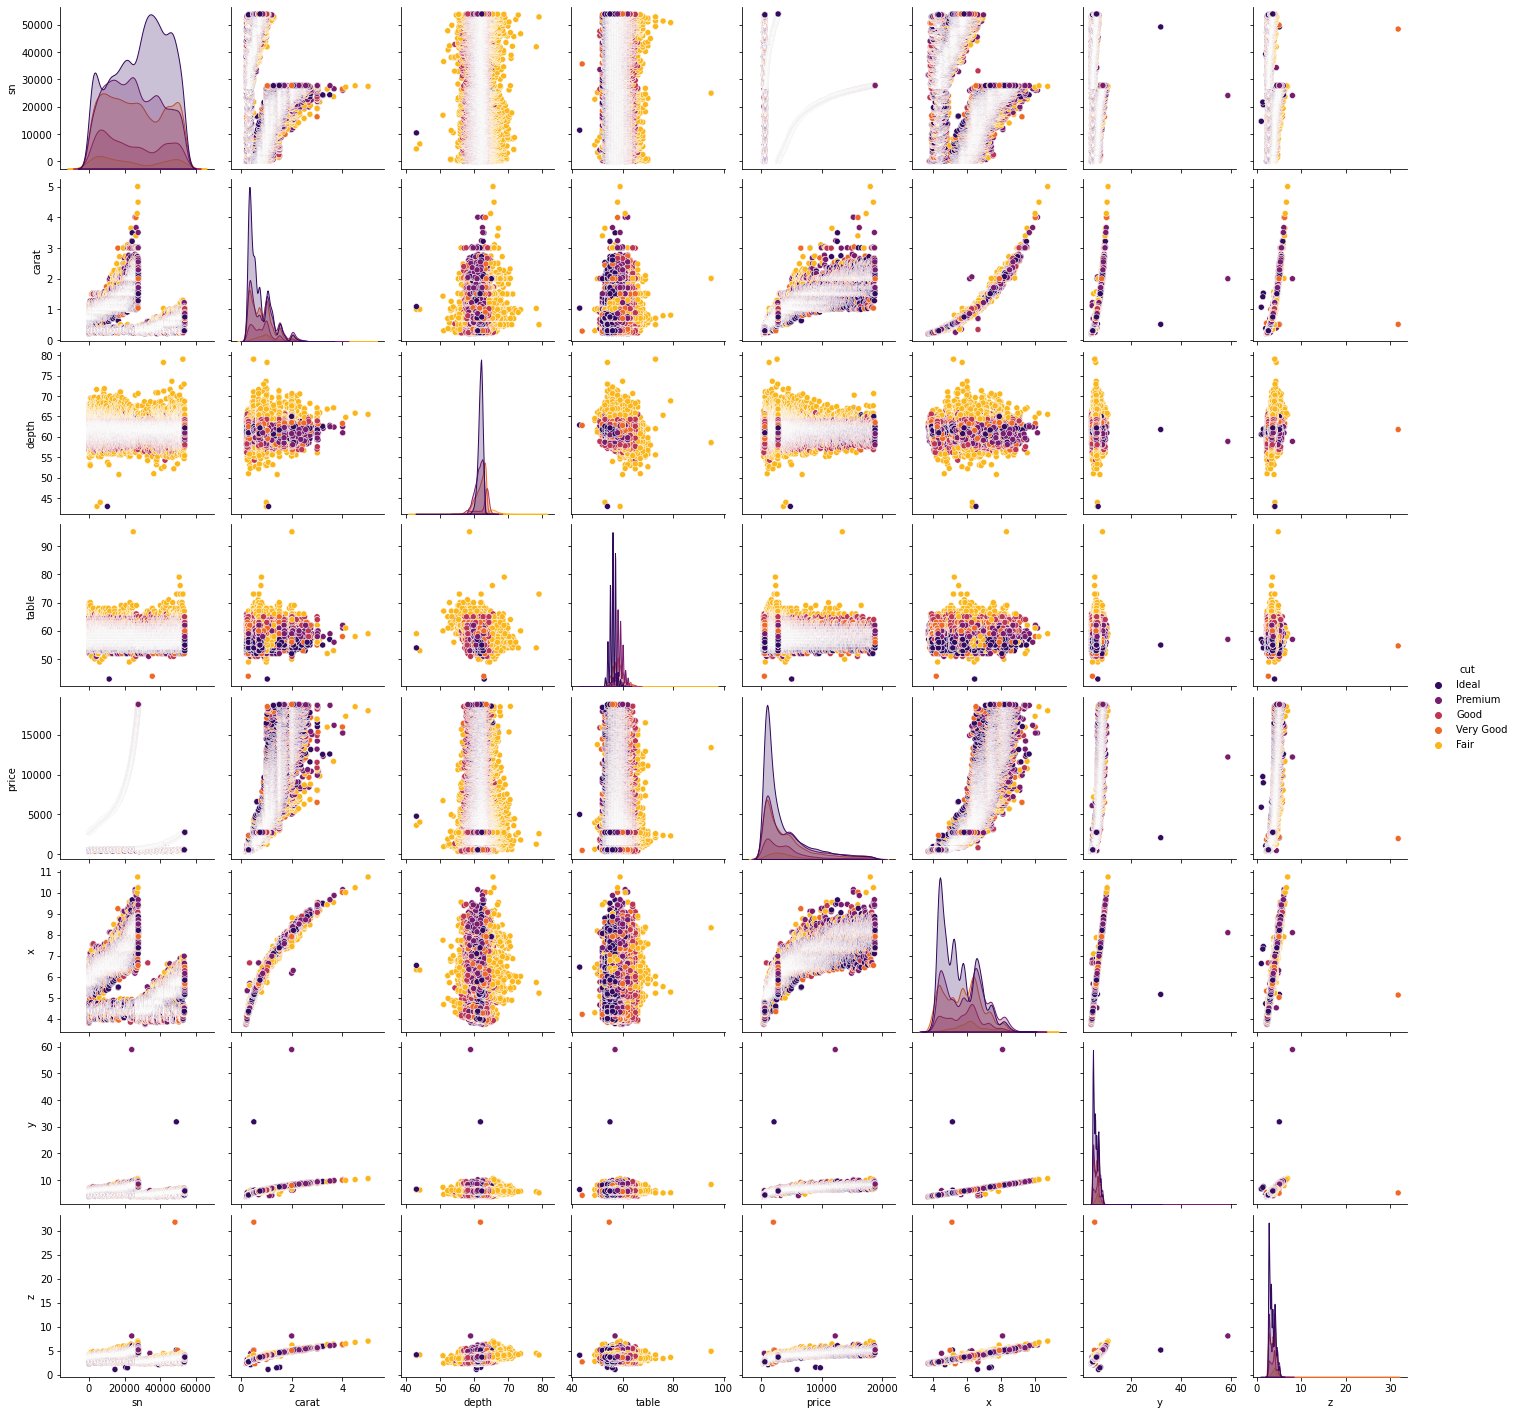

In [13]:
shade=["#835656","#baa0a0","#ffc7c8","#a9a799","#65634a"]
ax=sns.pairplot(df, hue="cut",palette='inferno')

Text(0.5, 1.0, 'LineRegression on price and y')

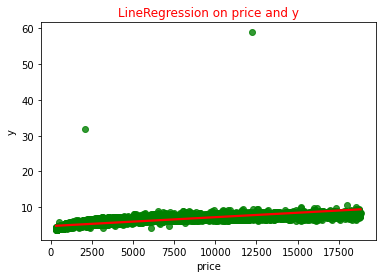

In [21]:
axs=sns.regplot(x="price", y="y", data=df, fit_reg=True,scatter_kws={"color":"g"}, line_kws={"color":"r"})
axs.set_title("LineRegression on price and y",color="r")

Text(0.5, 1.0, 'LineRegression on price and x')

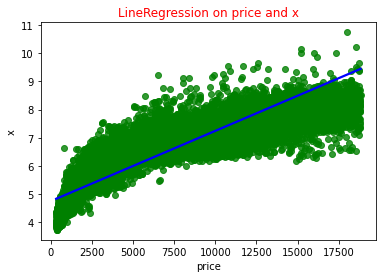

In [19]:
axs=sns.regplot(x="price", y="x", data=df, fit_reg=True,scatter_kws={"color":"g"}, line_kws={"color":"b"})
axs.set_title("LineRegression on price and x",color="r")

Text(0.5, 1.0, 'LineRegression on price and z')

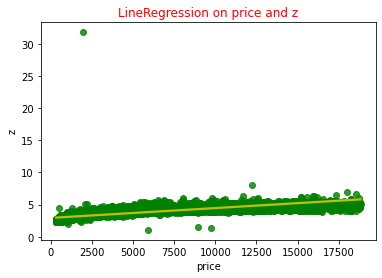

In [20]:
axs=sns.regplot(x="price", y="z", data=df, fit_reg=True,scatter_kws={"color":"g"}, line_kws={"color":"y"})
axs.set_title("LineRegression on price and z",color="r")

Text(0.5, 1.0, 'LineRegression on price and z')

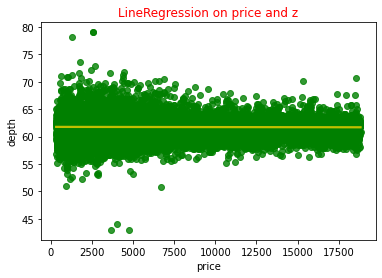

In [22]:
axs=sns.regplot(x="price", y="depth", data=df, fit_reg=True,scatter_kws={"color":"g"}, line_kws={"color":"y"})
axs.set_title("LineRegression on price and z",color="r")

Text(0.5, 1.0, 'LineRegression on price and z')

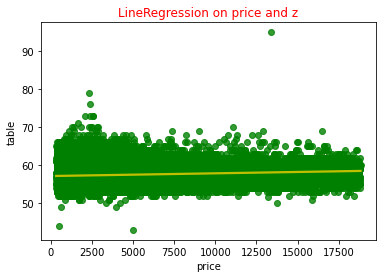

In [23]:
axs=sns.regplot(x="price", y="table", data=df, fit_reg=True,scatter_kws={"color":"g"}, line_kws={"color":"y"})
axs.set_title("LineRegression on price and z",color="r")

In [24]:
df=df[(df["depth"]<75) & (df["depth"]>45)]
df=df[(df["table"]<80) & (df["table"]>40)]
df=df[(df["x"]<30)]
df=df[(df["y"]<30)]
df=df[(df["z"]<30) & (df["z"]>2)]
df.shape

(53907, 11)

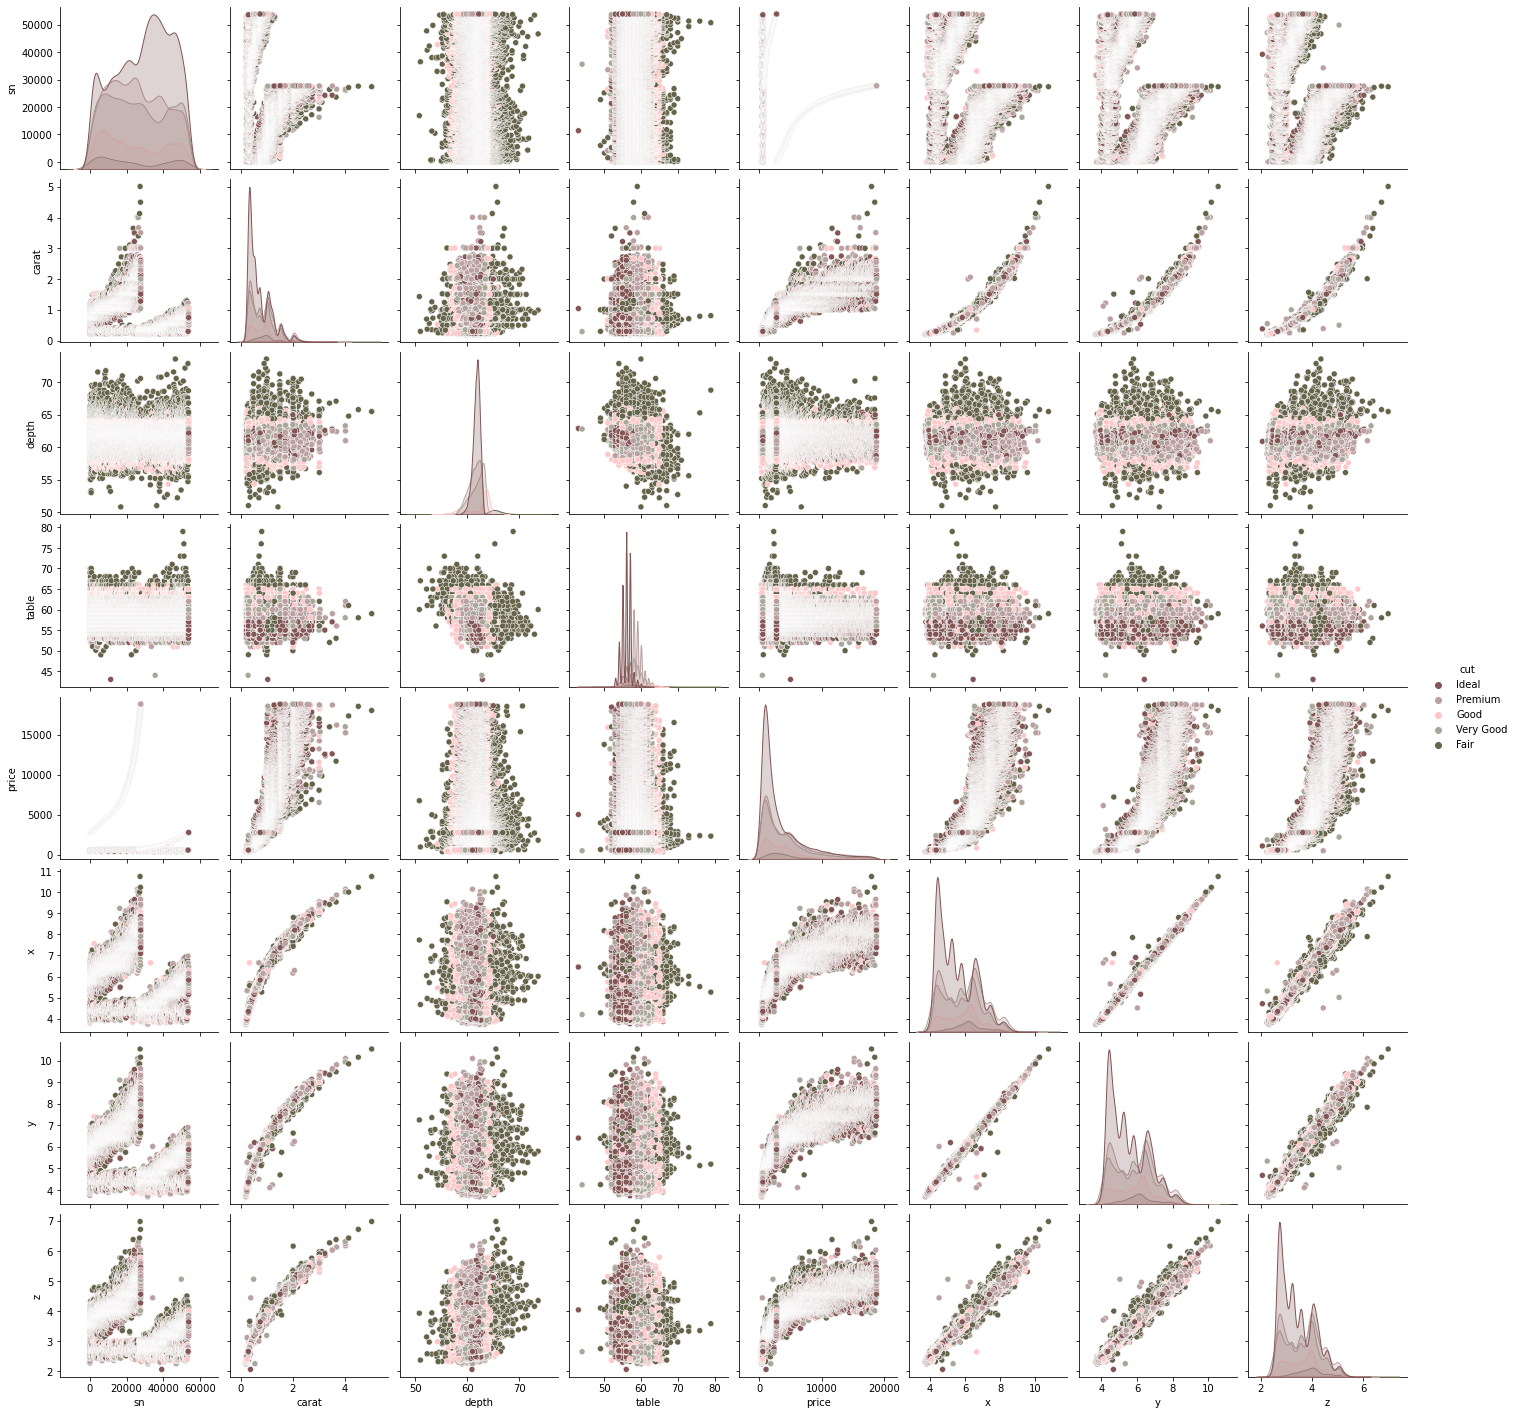

In [25]:
ax=sns.pairplot(df, hue="cut",palette=shade)

In [26]:
s= (df.dtypes =="object")
object_cols =list(s[s].index)
print("Categorial Variables: ")
print(object_cols)

Categorial Variables: 
['cut', 'color', 'clarity']


Text(0.5, 0, 'Cut')

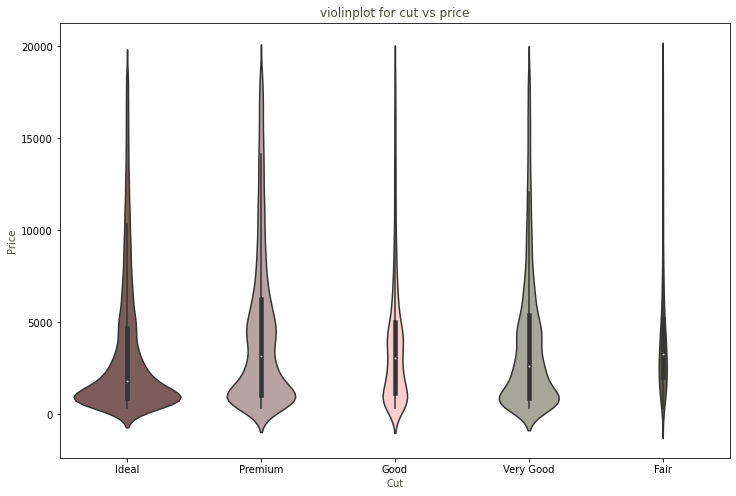

In [27]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="cut", y="price", data=df, palette=shade, scale="count")
ax.set_title("violinplot for cut vs price", color='#4e4c39')
ax.set_ylabel("Price", color='#4e4c39')
ax.set_xlabel("Cut", color='#4e4c39')

Text(0.5, 0, 'Color')

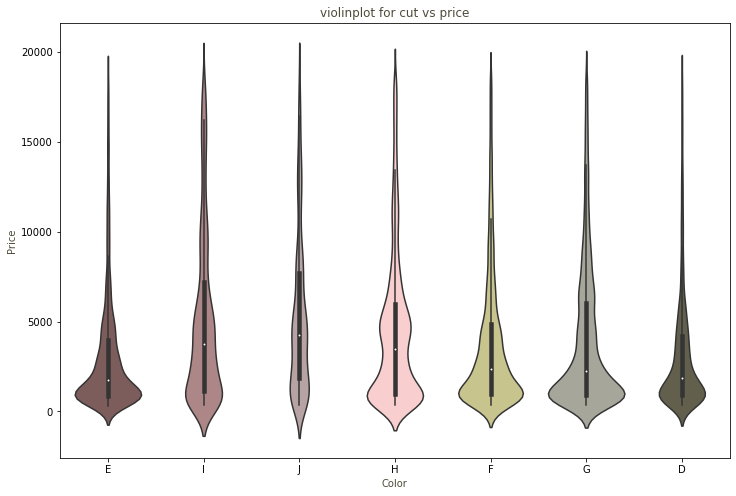

In [31]:
plt.figure(figsize=(12,8))
sh1=["#835656","#b38182","#baa0a0","#ffc7c8","#d0cd85","#a9a799","#65634a"]
ax=sns.violinplot(x="color", y="price", data=df, palette=sh1, scale="count")
ax.set_title("violinplot for cut vs price", color='#4e4c39')
ax.set_ylabel("Price", color='#4e4c39')
ax.set_xlabel("Color", color='#4e4c39')

Text(0.5, 0, 'Clarity')

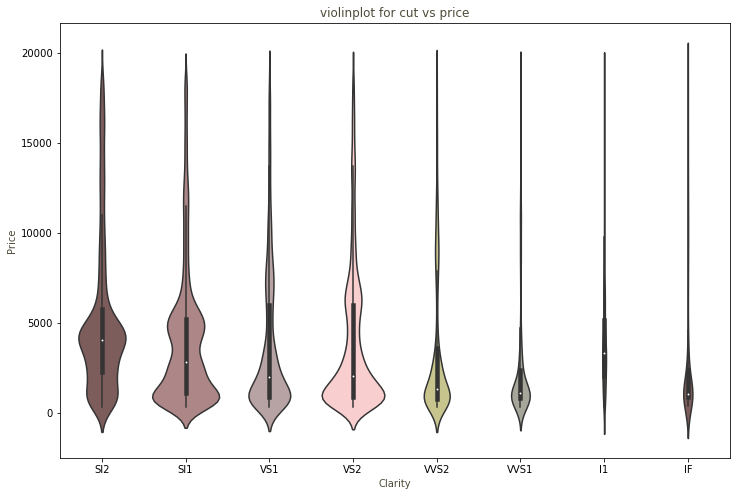

In [32]:
plt.figure(figsize=(12,8))
sh2=["#835656","#b38182","#baa0a0","#ffc7c8","f1f1f1","#d0cd85","#a9a799","#65634a"]
ax=sns.violinplot(x="clarity", y="price", data=df, palette=sh1, scale="count")
ax.set_title("violinplot for cut vs price", color='#4e4c39')
ax.set_ylabel("Price", color='#4e4c39')
ax.set_xlabel("Clarity", color='#4e4c39')

In [33]:
label_data=df.copy()
label_encoder=LabelEncoder()
for col in object_cols:
    label_data[col]=label_encoder.fit_transform(label_data[col])
label_data.head()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

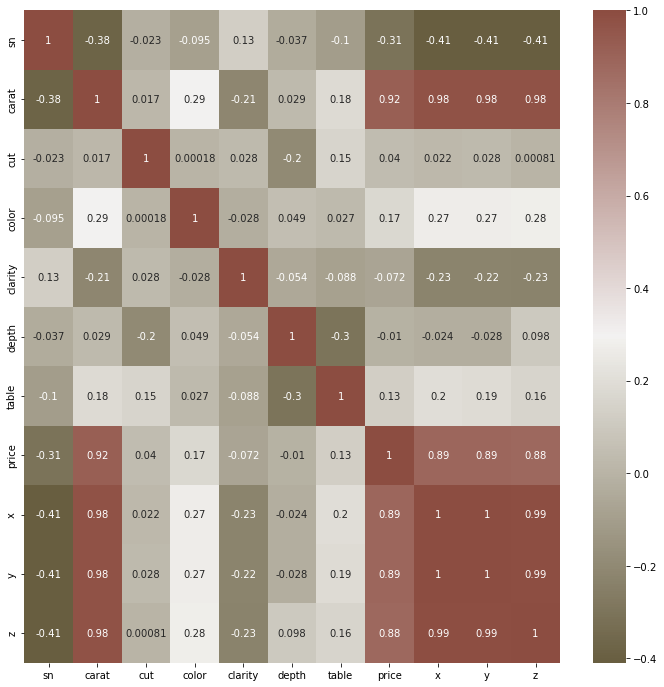

In [34]:
cmap=sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap=True)
corrmat=label_data.corr()
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, cmap=cmap, annot=True)

In [35]:
x=label_data.drop(["price"],axis=1)
y=label_data["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [38]:
pip_lr=Pipeline([("scalar1",StandardScaler()),
                ("lr_classifier",LinearRegression())])
pip_dt=Pipeline([("scalar2",StandardScaler()),
                ("dt_classifier",DecisionTreeRegressor())])
pip_rf=Pipeline([("scalar3",StandardScaler()),
                ("rf_classifier",RandomForestRegressor())])
pip_kn=Pipeline([("scalar4",StandardScaler()),
                ("kn_classifier",KNeighborsRegressor())])
pip_xg=Pipeline([("scalar5",StandardScaler()),
                ("xg_classifier",XGBRegressor())])
pipelines=[pip_lr, pip_dt, pip_rf, pip_kn, pip_xg]
pip_dict={0:"LinearRegression",1:"DecisionTree",2:"RandomForest",3:"KNeighbor",4:"XGBoost"}
for pip in pipelines:
    pip.fit(x_train,y_train)

In [42]:
cv_result=[]
for i,model in enumerate(pipelines):
    cv_score=cross_val_score(model, x_train, y_train, scoring="neg_root_mean_squared_error",cv=10)
    cv_result.append(cv_score)
    print("%s: %f" %(pip_dict[i], cv_score.mean()))

LinearRegression: -1344.798387
DecisionTree: -51.125981
RandomForest: -35.832555
KNeighbor: -666.216132
XGBoost: -42.915368


In [43]:
pred = pip_xg.predict(x_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9999177189695357
Adjusted R^2: 0.9999176578667357
MAE: 19.45811722499199
MSE: 1290.8103461595724
RMSE: 35.92784917246748
